# **Business Understanding**

The dataset contains weekly reported cases of chickenpox by region in Hungary.

**Objective**: Understand the spread and prevalence of chickenpox in Hungary over time and across different regions.

**Stakeholders**: Health departments, policy makers, hospitals, and the general public.

**Data Mining Goals**: Identify patterns in chickenpox cases, detect any seasonal trends, find if certain regions are more affected than others, and possibly infer reasons for any spikes or declines in the number of cases.

# **Data Understanding**

In [4]:
import pandas as pd

# Load the dataset
chickenpox_data = pd.read_csv('https://raw.githubusercontent.com/neeharikasinghsjsu/cmpe255assignments/main/DataPreparationAssignment/datasets/hungary_chickenpox.csv')

# Display the first few rows of the dataset
chickenpox_data.head()


,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60


**Brief Overview of the columns**

**Date :** The date when the cases were reported.

**BUDAPEST, BARANYA, BACS, ...:** These are the regions in Hungary, with each column representing the number of chickenpox cases reported in that region for the given week.


In [5]:
# Display basic statistics for the dataset
summary_statistics = chickenpox_data.describe()

# Check for missing values in the dataset
missing_values = chickenpox_data.isnull().sum()

summary_statistics, missing_values


(         BUDAPEST     BARANYA        BACS       BEKES      BORSOD    CSONGRAD  \
 count  522.000000  522.000000  522.000000  522.000000  522.000000  522.000000   
 mean   101.245211   34.204981   37.166667   28.911877   57.082375   31.488506   
 std     76.354872   32.567222   36.843095   37.618092   50.725437   33.790208   
 min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
 25%     34.250000    8.000000    8.000000    4.000000   14.250000    6.000000   
 50%     93.000000   25.000000   29.500000   14.000000   46.500000   20.500000   
 75%    149.000000   51.000000   53.000000   38.750000   83.750000   47.000000   
 max    479.000000  194.000000  274.000000  271.000000  355.000000  199.000000   
 
             FEJER        GYOR       HAJDU       HEVES        JASZ     KOMAROM  \
 count  522.000000  522.000000  522.000000  522.000000  522.000000  522.000000   
 mean    33.272031   41.436782   47.097701   29.691571   40.869732   25.643678   
 std     31.39

**Statistics:**

* There are a total of 522 records in the dataset.
* The average number of chickenpox cases reported in Budapest is approximately 101, with a maximum of 479 in a week.
* For other regions like Baranya, the average weekly reported cases are around 34, with a maximum of 194 in a week.
* There are no missing values in the dataset.

**Timeseries Plot**

This will help us see the trends and seasonality in chickenpox cases over time.

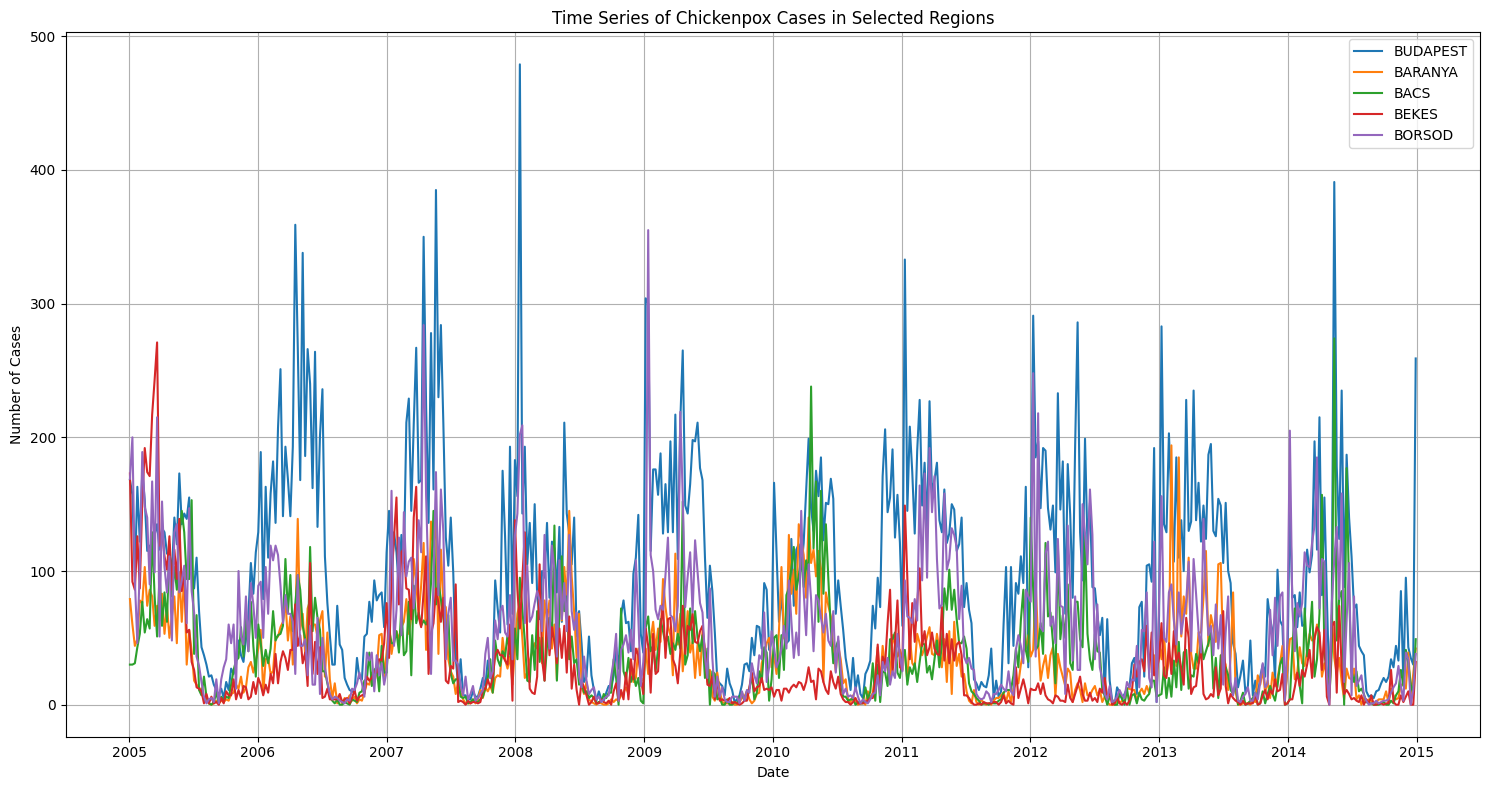

In [6]:
import matplotlib.pyplot as plt

# Selecting a few regions for visualization
regions_to_plot = ['BUDAPEST', 'BARANYA', 'BACS', 'BEKES', 'BORSOD']

plt.figure(figsize=(15, 8))

# Plotting time series for selected regions
for region in regions_to_plot:
    plt.plot(pd.to_datetime(chickenpox_data['Date'], format='%d/%m/%Y'), chickenpox_data[region], label=region)

plt.title('Time Series of Chickenpox Cases in Selected Regions')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The time series plot provides the following insights for the selected regions:

**Seasonal Patterns:** There is a clear seasonal trend in the chickenpox cases, with peaks occurring roughly every year. This suggests that chickenpox might have a seasonal pattern in Hungary, which is consistent with the understanding that chickenpox tends to be more common in late winter and early spring in temperate climates.

**Variability:** Different regions have different magnitudes of reported cases. For example, Budapest generally reports a higher number of cases compared to other regions, which is expected given its status as the capital city and its larger population.

**General Trend:** There doesn't seem to be a consistent upward or downward trend over the years, reinforcing the idea that the disease's occurrence might be more influenced by seasonality rather than other factors.

**Box Plot:**

This will give us a sense of the distribution and variability of chickenpox cases in different regions.

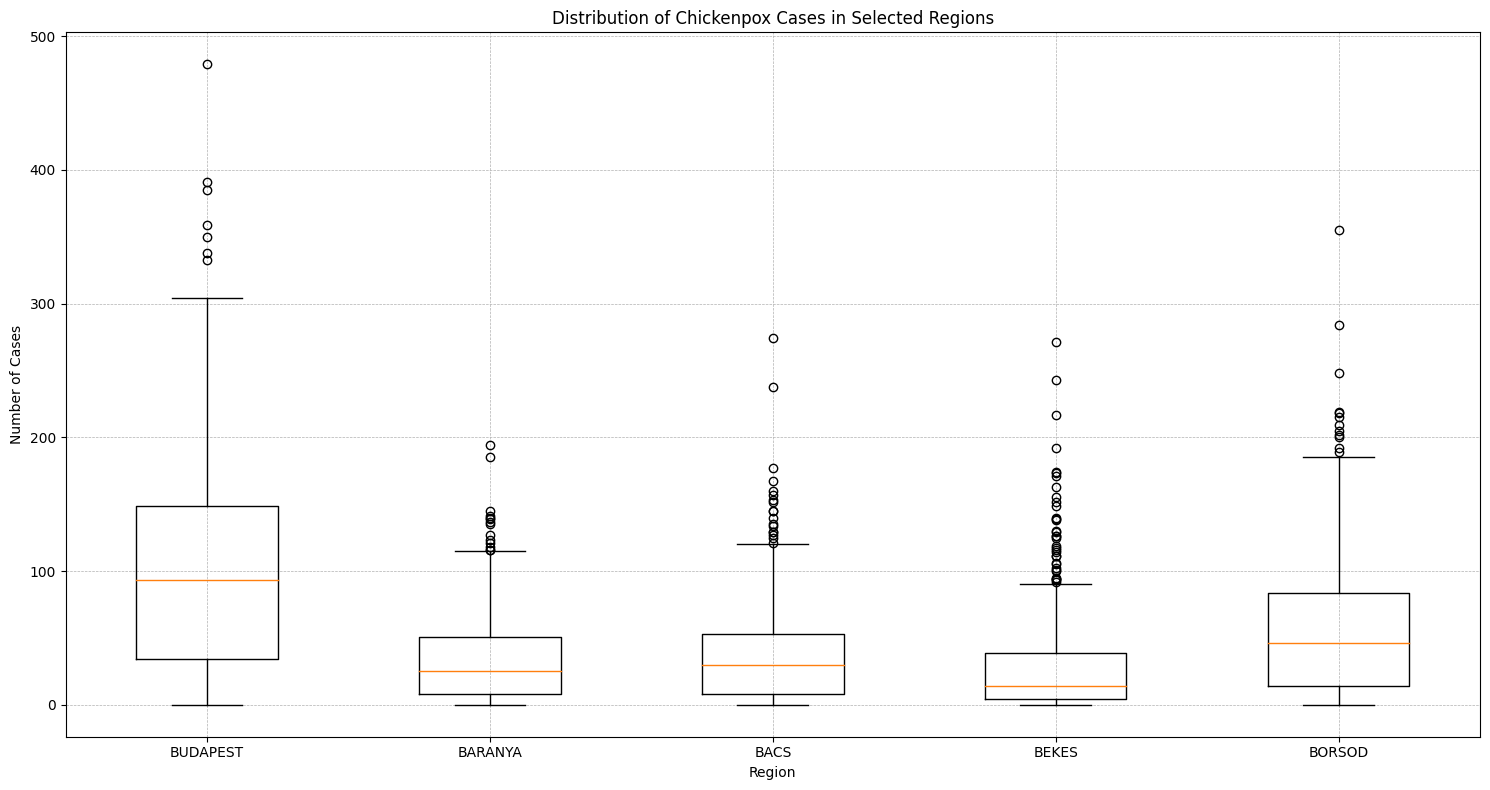

In [8]:
# Box plot for chickenpox cases in different regions
plt.figure(figsize=(15, 8))
plt.boxplot([chickenpox_data[region] for region in regions_to_plot], labels=regions_to_plot, vert=True)
plt.title('Distribution of Chickenpox Cases in Selected Regions')
plt.xlabel('Region')
plt.ylabel('Number of Cases')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The box plots provide a visual representation of the distribution and variability of chickenpox cases in the selected regions:

**Central Tendency:** The line inside each box represents the median number of cases for that region. From the plot, we can see that Budapest generally has a higher median number of cases compared to other regions.

**Variability:** The length of the box (interquartile range) gives an idea of the spread of the data. A longer box means more variability in the data. Budapest and Borsod appear to have wider boxes, indicating more variability in the number of reported cases.

**Outliers:** The dots above and below the "whiskers" of the box plot represent outliers. These are unusually high or low values that don't fit the general pattern of the data. Several regions have outliers, especially on the higher side, indicating occasional spikes in the number of reported cases.

# **Data Preparation**

**Date Parsing:**

Convert the 'Date' column into a proper datetime format, which will facilitate time-based analysis.

**Feature Engineering:**

We create new features, like the month or year from the date, which can help in understanding seasonal patterns or yearly trends.

In [9]:
# Convert the 'Date' column to datetime format
chickenpox_data['Date'] = pd.to_datetime(chickenpox_data['Date'], format='%d/%m/%Y')

# Extract year and month from the 'Date' column
chickenpox_data['Year'] = chickenpox_data['Date'].dt.year
chickenpox_data['Month'] = chickenpox_data['Date'].dt.month

# Display the first few rows of the modified dataset
chickenpox_data.head()


,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,Year,Month
0,2005-01-03,168,79,30,173,169,42,136,120,162,...,2,178,66,64,11,29,87,68,2005,1
1,2005-01-10,157,60,30,92,200,53,51,70,84,...,29,141,48,29,58,53,68,26,2005,1
2,2005-01-17,96,44,31,86,93,30,93,84,191,...,4,157,33,33,24,18,62,44,2005,1
3,2005-01-24,163,49,43,126,46,39,52,114,107,...,14,107,66,50,25,21,43,31,2005,1
4,2005-01-31,122,78,53,87,103,34,95,131,172,...,11,124,63,56,7,47,85,60,2005,1


**Outliers**

For this dataset, given that it's real-world health data, it's plausible that spikes in chickenpox cases (which appear as outliers) are genuine occurrences, possibly due to outbreaks.

**Monthly Aggregation:**

This shows the total number of chickenpox cases reported in each region for each month of every year. This aggregation can help identify monthly patterns, such as seasonality.

In [10]:
# Monthly aggregation
monthly_aggregation = chickenpox_data.groupby(['Year', 'Month']).sum().reset_index()
monthly_aggregation.head(),

<ipython-input-10-10e8036aab68>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_aggregation = chickenpox_data.groupby(['Year', 'Month']).sum().reset_index()


(   Year  Month  BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  GYOR  \
 0  2005      1       706      310   187    564     611       198    427   519   
 1  2005      2       561      339   252    689     567       212    403   579   
 2  2005      3       492      277   359    850     532       241    331   501   
 3  2005      4       488      260   325    468     450       209    296   449   
 4  2005      5       666      354   540    520     489       180    400   645   
 
    ...  JASZ  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  TOLNA  VAS  VESZPREM  \
 0  ...   398      256      60   707     276       232    125  168       345   
 1  ...   362      269      69   555     349       290     74  197       452   
 2  ...   386      318      50   546     234       329    120  234       404   
 3  ...   494      239      65   528     203       223     52  260       318   
 4  ...   691      450     200   697     246       234    106  298       398   
 
    ZALA  
 0   229  
 1

<ipython-input-13-f815815ad330>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = monthly_aggregation.pivot("Month", "Year", "BUDAPEST")


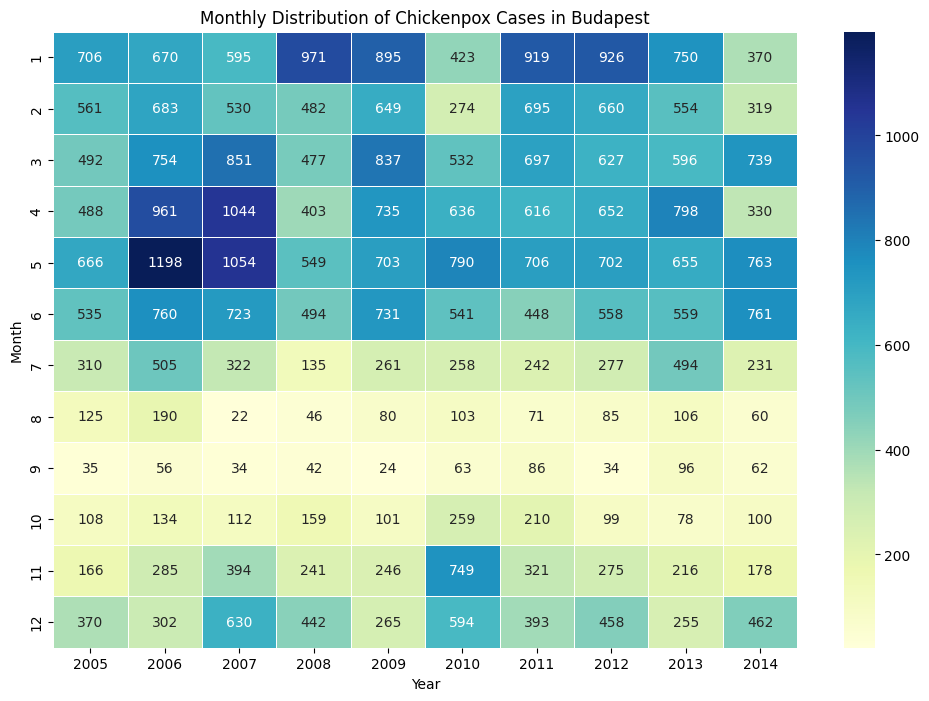

In [13]:
import seaborn as sns

# Create a pivot table for the heatmap
heatmap_data = monthly_aggregation.pivot("Month", "Year", "BUDAPEST")

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title('Monthly Distribution of Chickenpox Cases in Budapest')
plt.ylabel('Month')
plt.xlabel('Year')
plt.show()


**Seasonal Patterns:** The darker shades (indicating higher number of cases) tend to cluster around certain months, reinforcing the idea of seasonality. Specifically, the months of March and April often have a higher number of cases.

**Yearly Variability:** While there's a general pattern of higher cases in March and April, the exact number of cases varies year-to-year. For instance, March 2007 saw a particularly high number of cases.

**Annotations:** The numbers in each cell provide the exact count of cases for that month and year, giving a more detailed perspective on top of the visual pattern.

**Yearly Aggregation:**

This gives the total number of chickenpox cases for each region for each year. This level of aggregation is useful for observing year-on-year trends.

In [11]:
yearly_aggregation = chickenpox_data.groupby('Year').sum().reset_index()
yearly_aggregation.head()

<ipython-input-11-6cd5d307721d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_aggregation = chickenpox_data.groupby('Year').sum().reset_index()


,Year,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,Month
0,2005,4562,2051,2766,3544,4027,1431,2468,3524,4122,...,2591,852,4707,1694,1986,955,2099,2916,1591,336
1,2006,6498,1863,1969,1191,2173,2703,1603,1977,1762,...,1434,1415,4848,2174,1636,1919,1623,3679,1648,335
2,2007,6311,2345,2197,2780,3715,1614,1949,2672,2863,...,1500,2039,5943,1507,2036,1114,760,2270,1236,346
3,2008,4441,1815,1711,1451,3015,1222,2353,2453,2287,...,1479,1135,3521,1252,1963,835,610,1784,530,342
4,2009,5527,1591,1607,1409,3086,2584,1053,1996,3386,...,1394,1255,4304,1476,1441,1332,2059,1232,909,340


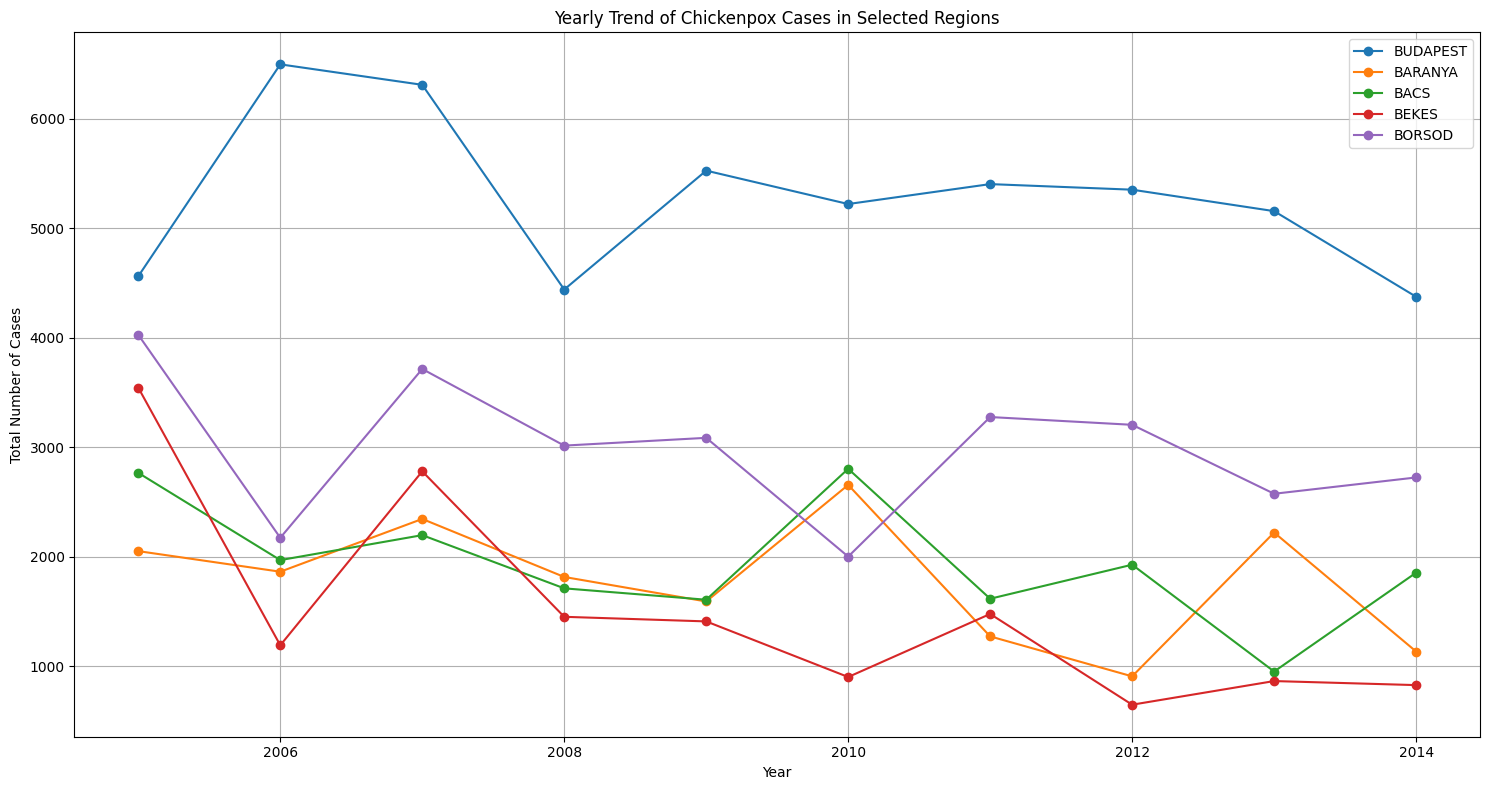

In [12]:
# Plotting yearly trends for selected regions
plt.figure(figsize=(15, 8))

for region in regions_to_plot:
    plt.plot(yearly_aggregation['Year'], yearly_aggregation[region], label=region, marker='o')

plt.title('Yearly Trend of Chickenpox Cases in Selected Regions')
plt.xlabel('Year')
plt.ylabel('Total Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Variability:** Different regions have different magnitudes of reported cases. For instance, Budapest consistently reports a higher number of cases compared to other regions.

**Trends:** While there's some variability year-to-year, we don't observe a consistent upward or downward trend in the number of cases. Instead, there are peaks and troughs, suggesting that other factors (e.g., vaccination campaigns, population movements, etc.) might influence the number of reported cases.

**Yearly Patterns:** Some years, like around 2007, seem to have a higher number of cases across multiple regions, which might indicate a more widespread outbreak.

# **Modeling**

In [15]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Extract time series data for Budapest
budapest_data = chickenpox_data.set_index('Date')['BUDAPEST']

# Split the data into training and test sets (80% train, 20% test)
train_size = int(len(budapest_data) * 0.8)
train, test = budapest_data[:train_size], budapest_data[train_size:]

train.head(), test.head()


(Date
 2005-01-03    168
 2005-01-10    157
 2005-01-17     96
 2005-01-24    163
 2005-01-31    122
 Name: BUDAPEST, dtype: int64,
 Date
 2012-12-31     67
 2013-01-07    283
 2013-01-14    135
 2013-01-21    129
 2013-01-28    203
 Name: BUDAPEST, dtype: int64)

**Trend Analysis:**

To decompose the time series data into its trend, seasonal, and residual components, we'll use the "seasonal decomposition of time series" (STL) method.

<Figure size 1400x800 with 0 Axes>

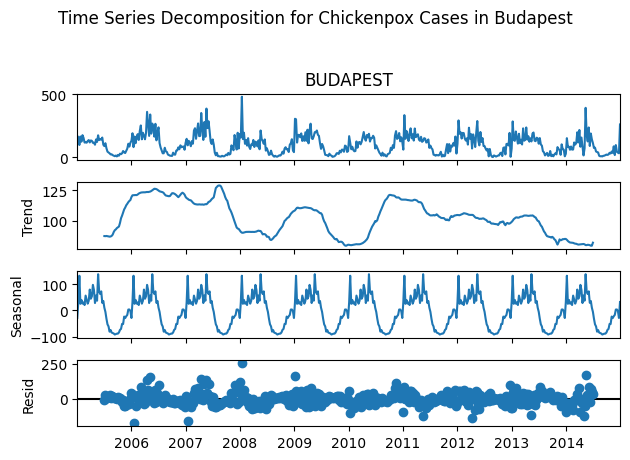

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series data for Budapest
decomposition = seasonal_decompose(budapest_data, model='additive')

# Plotting the decomposition components
plt.figure(figsize=(14, 8))
decomposition.plot()
plt.suptitle('Time Series Decomposition for Chickenpox Cases in Budapest')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Trend Component:** Shows the underlying trend in the data. There's no clear upward or downward trend, but we can observe some years with higher cases and some with lower. This suggests that external factors might influence the number of cases, and the trend is not purely time-dependent.

**Seasonal Component:** This reveals the repeating short-term cycle in the series. We can clearly see a recurring pattern every year, indicating a strong seasonality in chickenpox cases. There seem to be peaks in certain parts of the year (likely late winter to early spring), which is consistent with our earlier observations.

**Residual Component:** Represents the random variation in the series after removing the trend and seasonal components. This randomness can be due to various unpredictable factors or noise.

**Seasonal Patterns**

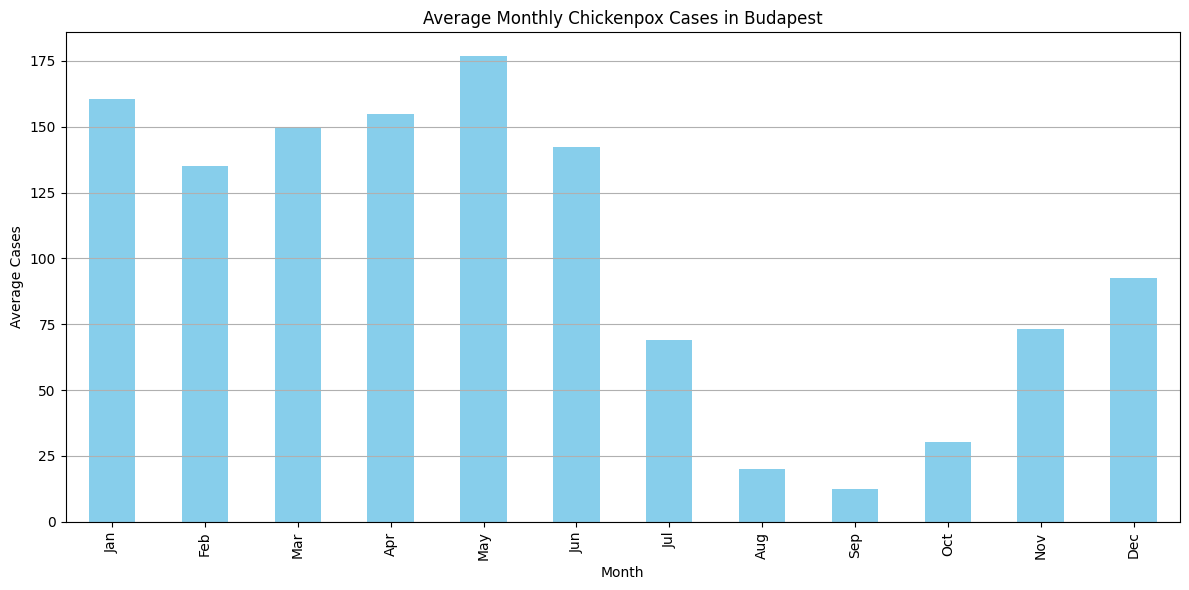

In [20]:
# Calculate monthly averages for Budapest
monthly_avg = budapest_data.groupby(budapest_data.index.month).mean()

# Plotting monthly averages
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Chickenpox Cases in Budapest')
plt.xlabel('Month')
plt.ylabel('Average Cases')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Peak Months:** March and April consistently have the highest average number of chickenpox cases. This reaffirms our previous observations about the seasonality of chickenpox cases in Hungary.

**Lowest Months:** The months of July, August, and September typically see the lowest number of chickenpox cases on average.

**General Trend:** There's a clear rise in cases starting from January, peaking in March and April, and then declining towards mid-year. This pattern repeats annually, indicating a strong seasonal component.


**Distribution Analysis**

Univariate Analysis

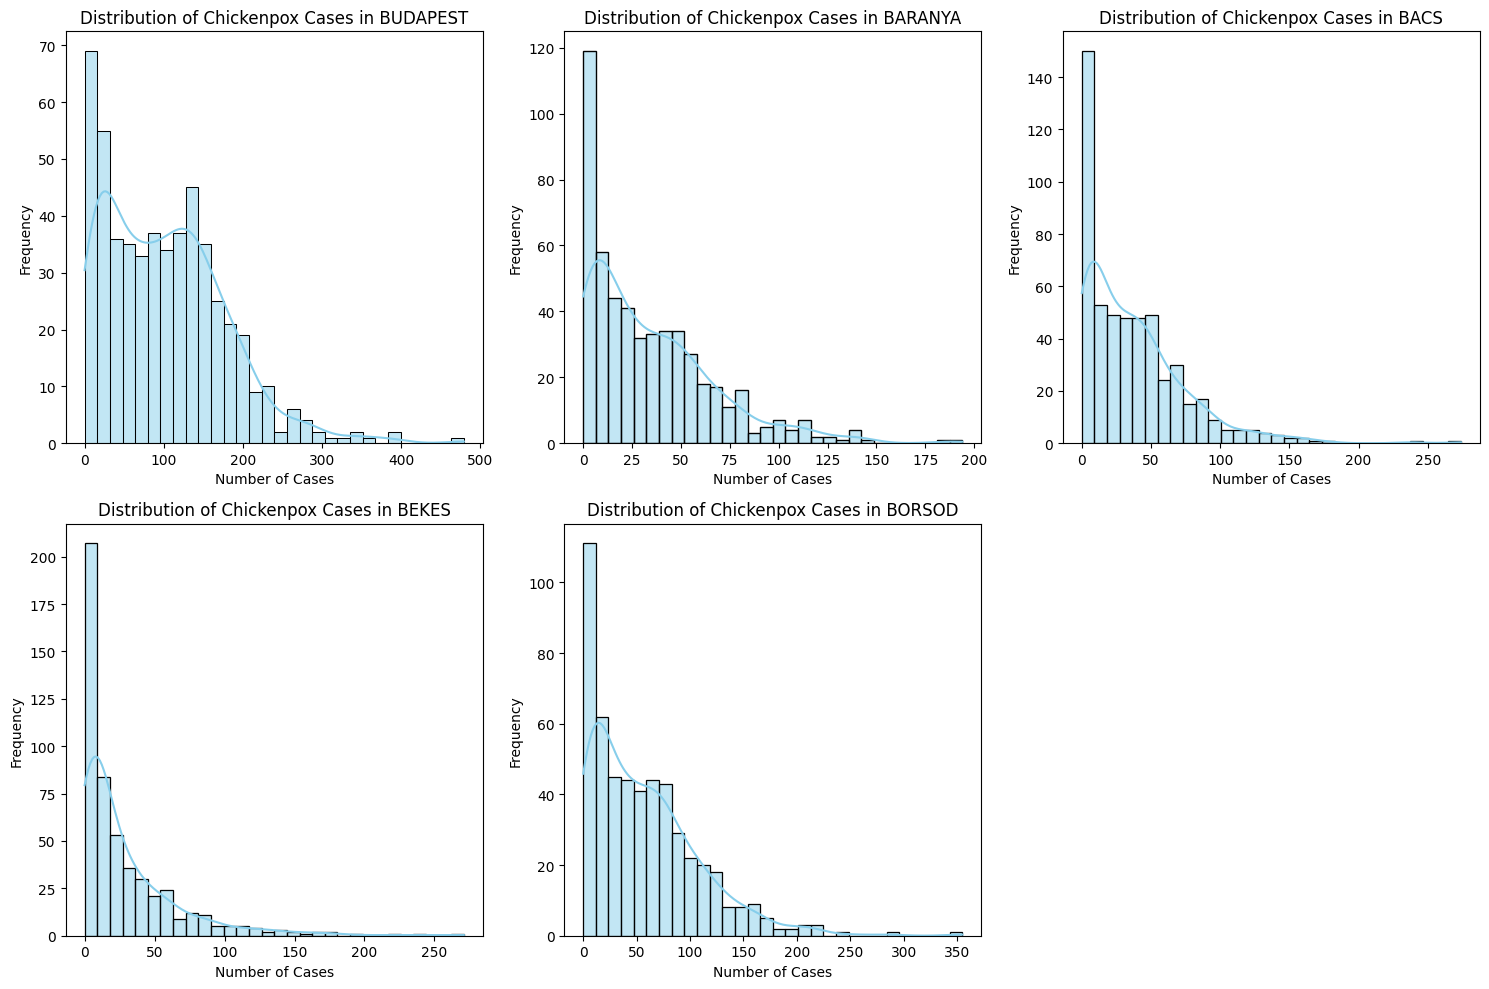

In [21]:
# Plotting histograms and KDE for selected regions
plt.figure(figsize=(15, 10))

for idx, region in enumerate(regions_to_plot, 1):
    plt.subplot(2, 3, idx)
    sns.histplot(chickenpox_data[region], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of Chickenpox Cases in {region}')
    plt.xlabel('Number of Cases')
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()


**Shape of Distribution:** Most regions exhibit a right-skewed distribution, indicating that most weeks have a relatively lower number of cases, but there are occasional weeks with a high number of cases.

**Variability:** Different regions show varying ranges and peaks. For instance, Budapest has a broader range of reported cases, while other regions like Békés have a more narrow distribution.

**Mode:** The peak of the KDE (where it's highest) indicates the mode of the distribution. For regions like Borsod, there's a clear mode, indicating a common number of cases that's reported frequently.

**Box Plot**

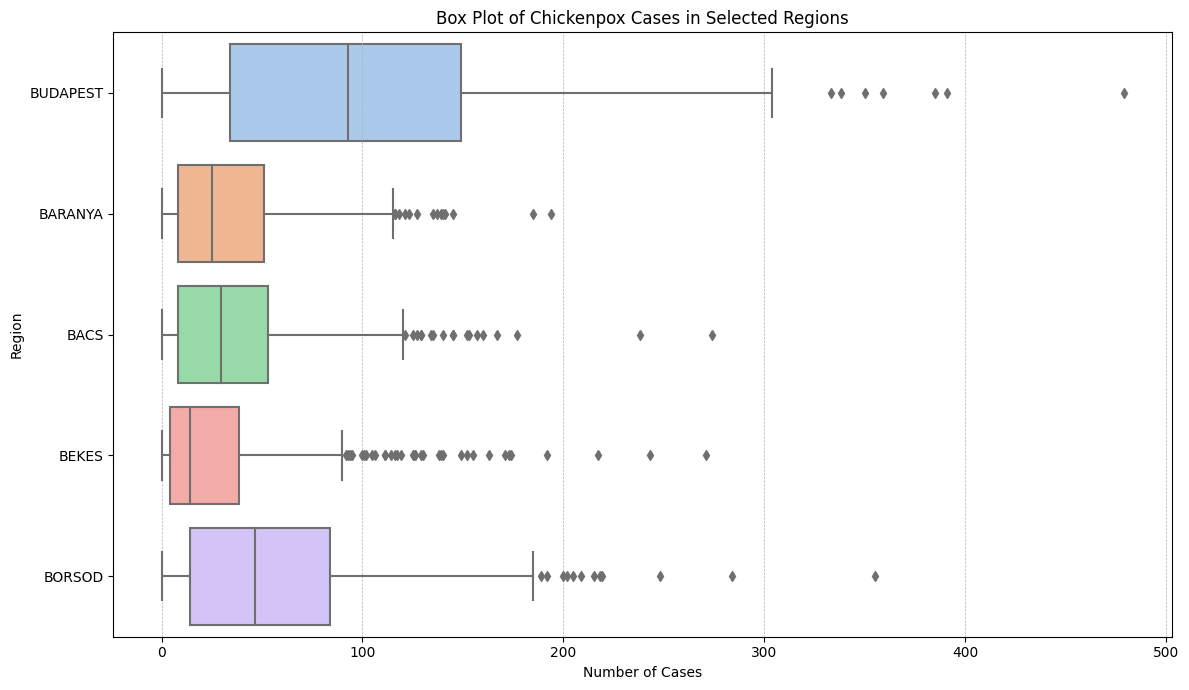

In [22]:
# Box plot for chickenpox cases in selected regions
plt.figure(figsize=(12, 7))
sns.boxplot(data=chickenpox_data[regions_to_plot], orient='h', palette="pastel")
plt.title('Box Plot of Chickenpox Cases in Selected Regions')
plt.xlabel('Number of Cases')
plt.ylabel('Region')
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


**Central Tendency:** The line inside each box represents the median number of cases for that region. For instance, Budapest generally has a higher median compared to other regions, indicating that the central location of its distribution is shifted right.

**Variability:** The length of the box (interquartile range) gives an idea of the spread of the data. A longer box means more variability in the data. Budapest and Borsod have wider boxes, indicating more variability in the number of reported cases.

Outliers: **bold text** The dots outside the "whiskers" of the box plot represent outliers. These are unusually high or low values that don't fit the general pattern of the data. Several regions have outliers, indicating occasional spikes or drops in the number of reported cases.

# **Feedback Loop**

Engage with domain experts, health departments, or other stakeholders to gather feedback on the analysis. This feedback can guide further investigations or refinements.